In [12]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

features_df = pd.read_csv("geo_fossil_texture_features_95.csv")

meta_cols = ["split", "class_name", "image_rel_path"]
feature_cols = [c for c in features_df.columns if c not in meta_cols]

print("Number of features:", len(feature_cols))
print("First 10 feature columns:", feature_cols[:10])

# Split by your 'split' column
train_df = features_df[features_df["split"] == "train"].copy()
val_df   = features_df[features_df["split"] == "val"].copy()
test_df  = features_df[features_df["split"] == "test"].copy()

print("Train:", train_df.shape, " Val:", val_df.shape, " Test:", test_df.shape)

X_train = train_df[feature_cols].values
y_train = train_df["class_name"].values

X_val   = val_df[feature_cols].values
y_val   = val_df["class_name"].values

X_test  = test_df[feature_cols].values
y_test  = test_df["class_name"].values

classes = sorted(np.unique(y_train))
print("Classes:", classes)

# Scale (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape


Number of features: 95
First 10 feature columns: ['edge_density', 'edge_mean_length', 'edge_orient_bin_00', 'edge_orient_bin_01', 'edge_orient_bin_02', 'edge_orient_bin_03', 'edge_orient_bin_04', 'edge_orient_bin_05', 'edge_orient_bin_06', 'edge_orient_bin_07']
Train: (839, 98)  Val: (180, 98)  Test: (181, 98)
Classes: ['Ammonites', 'Belemnites', 'Corals', 'Crinoids', 'Leaf fossils', 'Trilobites']


((839, 95), (180, 95), (181, 95))


Training model: LogReg


/apps/tensorflow/2.18/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogReg - Train acc: 0.790, macro-F1: 0.790
LogReg - Val   acc: 0.706, macro-F1: 0.703
LogReg - Test  acc: 0.707, macro-F1: 0.708

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.769     0.667     0.714        30
  Belemnites      0.714     0.667     0.690        30
      Corals      0.759     0.733     0.746        30
    Crinoids      0.750     0.677     0.712        31
Leaf fossils      0.605     0.767     0.676        30
  Trilobites      0.688     0.733     0.710        30

    accuracy                          0.707       181
   macro avg      0.714     0.707     0.708       181
weighted avg      0.714     0.707     0.708       181



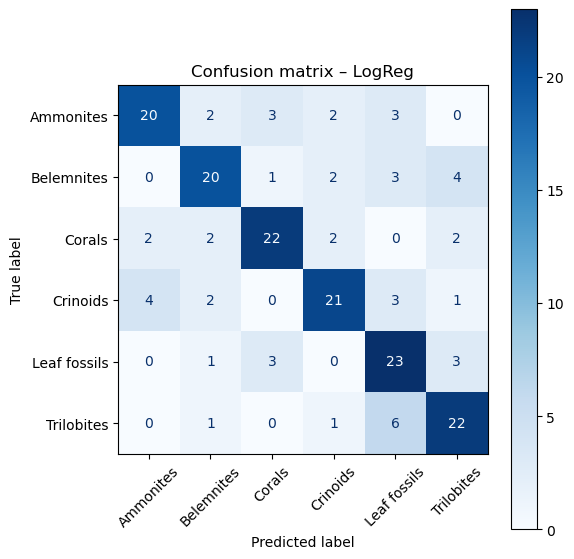

Saved confusion matrix to: results/texture-only classifier/cm_texture_logreg.png

Training model: LinearSVM
LinearSVM - Train acc: 0.820, macro-F1: 0.819
LinearSVM - Val   acc: 0.706, macro-F1: 0.703
LinearSVM - Test  acc: 0.702, macro-F1: 0.702

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.647     0.733     0.688        30
  Belemnites      0.714     0.667     0.690        30
      Corals      0.870     0.667     0.755        30
    Crinoids      0.667     0.645     0.656        31
Leaf fossils      0.667     0.800     0.727        30
  Trilobites      0.700     0.700     0.700        30

    accuracy                          0.702       181
   macro avg      0.711     0.702     0.702       181
weighted avg      0.710     0.702     0.702       181



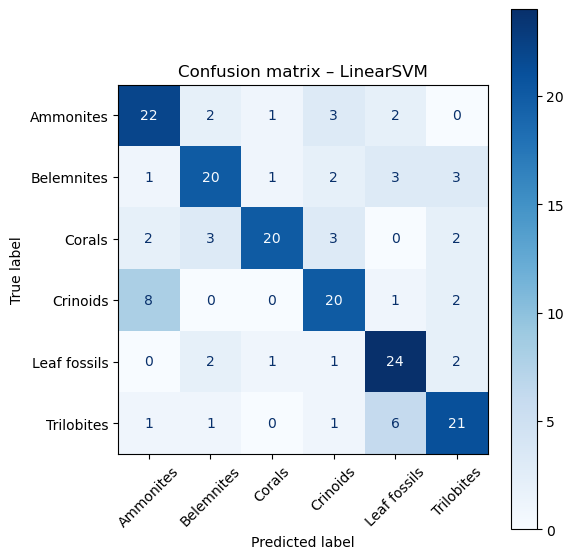

Saved confusion matrix to: results/texture-only classifier/cm_texture_linearsvm.png

Training model: RBF-SVM
RBF-SVM - Train acc: 0.768, macro-F1: 0.768
RBF-SVM - Val   acc: 0.656, macro-F1: 0.655
RBF-SVM - Test  acc: 0.652, macro-F1: 0.654

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.810     0.567     0.667        30
  Belemnites      0.636     0.700     0.667        30
      Corals      0.731     0.633     0.679        30
    Crinoids      0.714     0.645     0.678        31
Leaf fossils      0.512     0.700     0.592        30
  Trilobites      0.625     0.667     0.645        30

    accuracy                          0.652       181
   macro avg      0.671     0.652     0.654       181
weighted avg      0.672     0.652     0.655       181



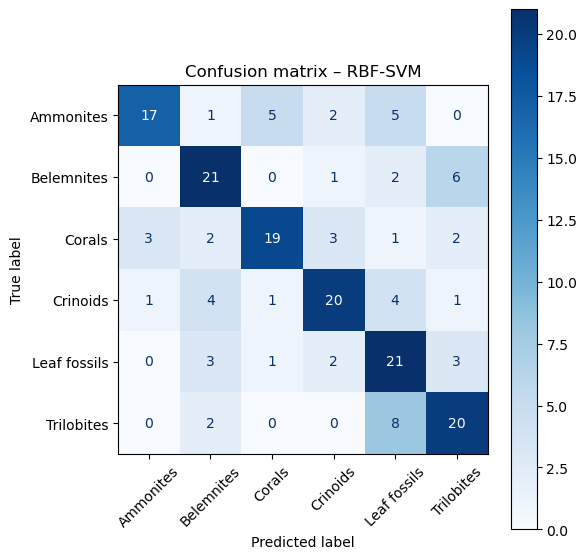

Saved confusion matrix to: results/texture-only classifier/cm_texture_rbf-svm.png

Training model: RandomForest
RandomForest - Train acc: 1.000, macro-F1: 1.000
RandomForest - Val   acc: 0.628, macro-F1: 0.626
RandomForest - Test  acc: 0.602, macro-F1: 0.601

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.571     0.533     0.552        30
  Belemnites      0.655     0.633     0.644        30
      Corals      0.696     0.533     0.604        30
    Crinoids      0.621     0.581     0.600        31
Leaf fossils      0.500     0.567     0.531        30
  Trilobites      0.605     0.767     0.676        30

    accuracy                          0.602       181
   macro avg      0.608     0.602     0.601       181
weighted avg      0.608     0.602     0.601       181



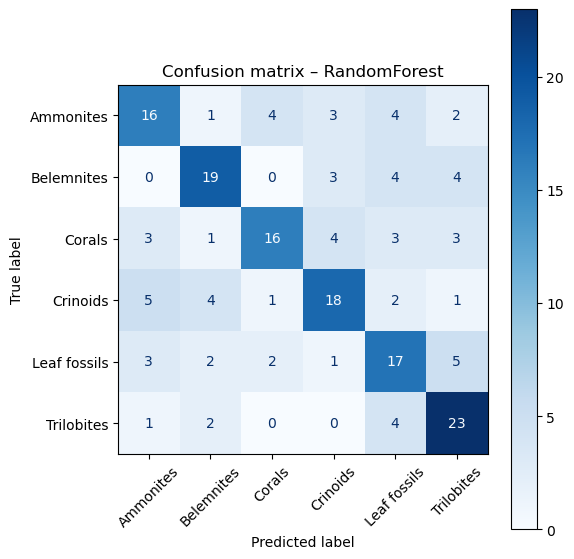

Saved confusion matrix to: results/texture-only classifier/cm_texture_randomforest.png

Training model: GradBoost
GradBoost - Train acc: 1.000, macro-F1: 1.000
GradBoost - Val   acc: 0.611, macro-F1: 0.609
GradBoost - Test  acc: 0.635, macro-F1: 0.636

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.645     0.667     0.656        30
  Belemnites      0.731     0.633     0.679        30
      Corals      0.640     0.533     0.582        30
    Crinoids      0.714     0.645     0.678        31
Leaf fossils      0.559     0.633     0.594        30
  Trilobites      0.568     0.700     0.627        30

    accuracy                          0.635       181
   macro avg      0.643     0.635     0.636       181
weighted avg      0.643     0.635     0.636       181



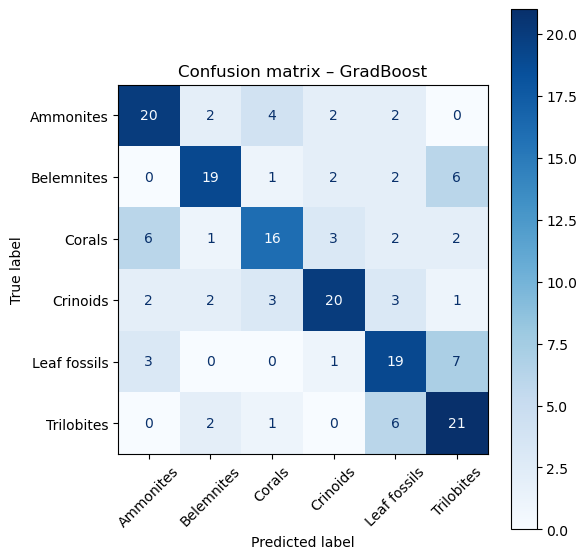

Saved confusion matrix to: results/texture-only classifier/cm_texture_gradboost.png

Training model: KNN
KNN - Train acc: 1.000, macro-F1: 1.000
KNN - Val   acc: 0.589, macro-F1: 0.585
KNN - Test  acc: 0.580, macro-F1: 0.577

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.500     0.600     0.545        30
  Belemnites      0.720     0.600     0.655        30
      Corals      0.500     0.400     0.444        30
    Crinoids      0.700     0.452     0.549        31
Leaf fossils      0.512     0.733     0.603        30
  Trilobites      0.636     0.700     0.667        30

    accuracy                          0.580       181
   macro avg      0.595     0.581     0.577       181
weighted avg      0.595     0.580     0.577       181



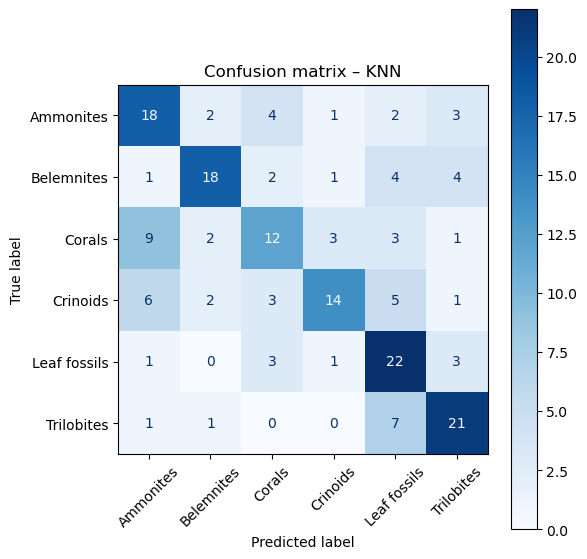

Saved confusion matrix to: results/texture-only classifier/cm_texture_knn.png

Training model: GaussianNB
GaussianNB - Train acc: 0.526, macro-F1: 0.510
GaussianNB - Val   acc: 0.433, macro-F1: 0.411
GaussianNB - Test  acc: 0.519, macro-F1: 0.507

Test classification report:
              precision    recall  f1-score   support

   Ammonites      0.667     0.267     0.381        30
  Belemnites      0.489     0.733     0.587        30
      Corals      0.462     0.400     0.429        30
    Crinoids      0.429     0.677     0.525        31
Leaf fossils      0.550     0.367     0.440        30
  Trilobites      0.690     0.667     0.678        30

    accuracy                          0.519       181
   macro avg      0.548     0.518     0.507       181
weighted avg      0.547     0.519     0.507       181



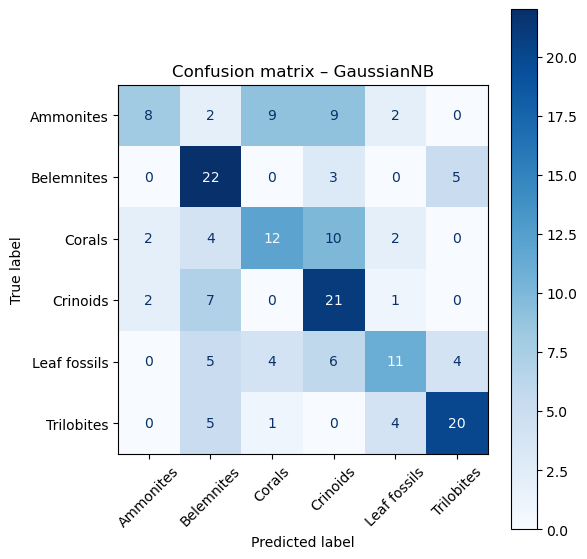

Saved confusion matrix to: results/texture-only classifier/cm_texture_gaussiannb.png
Saved results table to: results/texture-only classifier/classic_ml_texture_results.csv


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Folder for confusion matrices & results
RESULTS_DIR = Path("results/texture-only classifier")

RESULTS_DIR.mkdir(parents=True, exist_ok=True)

models = {
    "LogReg": LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        C=1.0,
        max_iter=2000,
        n_jobs=-1,
        random_state=42,
    ),
    "LinearSVM": LinearSVC(
        C=1.0,
        loss="squared_hinge",
        max_iter=5000,
        random_state=42,
    ),
    "RBF-SVM": SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        probability=False,
        random_state=42,
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        random_state=42,
    ),
    "GradBoost": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights="distance",
        metric="minkowski",
    ),
    "GaussianNB": GaussianNB(),
}

results = []

for name, clf in models.items():
    print(f"\n==========================")
    print(f"Training model: {name}")
    print(f"==========================")

    # Tree-based and NB can use unscaled, but using scaled for all is fine.
    Xtr = X_train_scaled
    Xva = X_val_scaled
    Xte = X_test_scaled

    clf.fit(Xtr, y_train)

    # Predictions
    y_tr_pred = clf.predict(Xtr)
    y_va_pred = clf.predict(Xva)
    y_te_pred = clf.predict(Xte)

    # Metrics
    train_acc = accuracy_score(y_train, y_tr_pred)
    val_acc   = accuracy_score(y_val,   y_va_pred)
    test_acc  = accuracy_score(y_test,  y_te_pred)

    train_f1 = f1_score(y_train, y_tr_pred, average="macro")
    val_f1   = f1_score(y_val,   y_va_pred, average="macro")
    test_f1  = f1_score(y_test,  y_te_pred, average="macro")

    print(f"{name} - Train acc: {train_acc:.3f}, macro-F1: {train_f1:.3f}")
    print(f"{name} - Val   acc: {val_acc:.3f}, macro-F1: {val_f1:.3f}")
    print(f"{name} - Test  acc: {test_acc:.3f}, macro-F1: {test_f1:.3f}")

    # Classification report on test (optional to inspect)
    print("\nTest classification report:")
    print(classification_report(y_test, y_te_pred, digits=3))

    # Save metrics to list
    results.append({
        "model": name,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "test_acc": test_acc,
        "train_macro_f1": train_f1,
        "val_macro_f1": val_f1,
        "test_macro_f1": test_f1,
    })

    # Confusion matrix
    cm = confusion_matrix(y_test, y_te_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    plt.figure(figsize=(6, 6))
    disp.plot(include_values=True, cmap="Blues", ax=plt.gca(), xticks_rotation=45)
    plt.title(f"Confusion matrix – {name}")
    plt.tight_layout()

    # Safe file name: no spaces, lower-case
    file_name = f"cm_texture_{name.lower()}.png"
    out_path = RESULTS_DIR / file_name
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()

    print("Saved confusion matrix to:", out_path)

results_df = pd.DataFrame(results)
results_df

results_csv_path = RESULTS_DIR / "classic_ml_texture_results.csv"
results_df.to_csv(results_csv_path, index=False)
print("Saved results table to:", results_csv_path)